# Laboratorium nr 11 - Sieci neuronowe (na bazie notebooka przygotowanego przed Dominika Matuszka na Olimpijskie Koło Sztucznej Inteligencji Uniwersytetu Jagiellońskiego)

Na dzisiejszych zajęciach zajmiemy się sieciami neuronowymi -- konkretnie: 

* omówimy architekturę perceptrona, pokażemy jego implementację i omówimy jego ograniczenia,
* rozwiążemy problemy z pojedynczym perceptronem za pomocą perceptrona wielowarstwowego (MLP),
* omówimy pojęcia związane z trenowaniem MLP: rozmiar batcha, learning rate.

## Perceptron

Najprostszym przykładem sieci neuronowej jest **perceptron**. Omówimy teraz jego architekturę. 

### Zadanie perceptrona

Perceptron dokonuje klasyfikacji binarnej -- to znaczy dla odpowiedniego zestawu danych liczbowych przypisuje im jedną z dwóch klas. 

Przykłady:
* mamy dane dwie wartości boolowskie $x_1, x_2 \in \{0, 1\}$ i chcemy na wyjściu otrzymać wartościowanie zdania logicznego $x_1 \land x_2$;
* mamy dane dwie wartości boolowskie $x_1, x_2 \in \{0, 1\}$ i chcemy na wyjściu otrzymać wartościowanie zdania logicznego $x_1 \lor x_2$;
* mniej trywialne: mamy procentowe dane o wynikach z kolokwiów studentów danego przedmiotu i chcemy na ich podstawie przewidzieć, czy student zda egzamin końcowy; 

### Wejście 

Perceptron na wejściu przyjmuje wektor liczb rzeczywistych o długości `n`, dla ustalonego `n`. 

### Wyjście

Perceptron na wyjściu zwraca jedną liczbę rzeczywistą -- nazwijmy ją `y`. Jeśli $y \geq 0$, to interpretujemy to tak, że perceptron przypisuje dane wejściowe do klasy `1`, w przeciwnym wypadku do klasy `0`.

### Architektura 

Perceptron posiada tak zwane **wagi**. Są one liczbami rzeczywistymi i jest ich tyle, ile wynosi długość wektora wejściowego. Będą one modyfikowane w procesie uczenia, ale o tym za chwilę.

Dla wartości na wejściu $x_1, x_2, \dots, x_n$ oraz wag $w_1, w_2, \dots, w_n$ perceptron oblicza wartość wyjścia jako:

$$
y = x_1 \cdot w_1 + x_2 \cdot w_2 + \dots + x_n \cdot w_n
$$

To tyle. 

Wygodnie jest traktować wejście jako wektor $X = (x_1, x_2, \dots, x_n)$ oraz wagi jako wektor $W = (w_1, w_2, \dots, w_n)$. Wówczas wyjście jest po prostu iloczynem skalarnym tych wektorów:

$$
y = X \odot W
$$

<img src="images/perceptron.png" alt="Perceptron" width="600"/>

### Uczenie 

Pozostaje jedno, jedyne pytanie: jak "nauczyć" perceptron wag? Ogólny algorytm wygląda tak:

1. Inicjalizujemy wagi losowymi wartościami (lub zerami).
2. Poniższe punkty powtarzamy wielokrotnie, aż wyniki nie będą satysfakcjonujące:
    1. Losujemy przykład treningowy ze zbioru uczącego, czyli jakiś wektor wejściowy $X$ oraz oczekiwane wyjście $y_{\mathrm{true}}$, gdzie $y_{\mathrm{true}} \in \{0, 1\}$ oznacza do której klasy należy wektor $X$.
    2. Obliczamy wyjście perceptronu dla wejścia $X$, obliczając $y = X \cdot W$ i sprawdzając, czy $y \geq 0$ (czyli sprawdzamy do jakiej klasy przypisuje perceptron wektor $X$), otrzymując $y_{\mathrm{pred}} \in \{0, 1\}$.
    3. Porównujemy odpowiedź perceptrona $y_{\mathrm{pred}}$ z poprawną odpowiedzią $y_{\mathrm{true}}$.
        * Jeśli $y_{\mathrm{pred}} = y_{\mathrm{true}}$, to nic nie robimy i przechodzimy do wylosowania kolejnego przykładu treningowego.
        * Jeśli $y_{\mathrm{pred}} \neq y_{\mathrm{true}}$, to znaczy że perceptron odpowiedział źle. Musimy więc zatem zmodyfiować jego wagi. Wagi zmieniamy w następujący sposób:
            * Jeśli $y_{\mathrm{pred}} = 0$ i $y_{\mathrm{true}} = 1$, to znaczy że wynik obliczony przez perceptron był mniejszy od zera, a powinien być większy. **Wykonujemy modyfikację wag: $W := W + X$.**
            * Jeśli $y_{\mathrm{pred}} = 1$ i $y_{\mathrm{true}} = 0$, to znaczy że wynik obliczony przez perceptron był większy od zera, a powinien być mniejszy. **Wykonujemy modyfikację wag: $W := W - X$.**

### Intuicja za sensownością modyfikacji wag

Oczywiście, można zadać pytanie: dlaczego modyfikujemy wagi akurat w taki sposób, dodając (lub odejmując) $X$ do wektora wag $W$? Żeby przedstawić intuicję stojącą za tym podejściem, załóżmy że perceptron przypisał nam jakiś wektor $X$ do klasy 0, a chcieliśmy by przypisał do klasy 1.

Zgodnie z naszym algorytmem, zmodyfikujemy wówczas wektor wag następująco:

$$

W := W + X

$$ 

Pokażmy, że po tej modyfikacji perceptron być może nie będzie jeszcze przypisować wektora $X$ do klasy 1, ale otrzymywane wartości będą bliższe tej klasy niż przed modyfikacją. Aby to pokazać rozważmy różnicę:

$$
X \odot (W + X) - X \odot W 
$$

Jeśli będzie ona dodatnia, to znaczy że perceptron "przybliży" się do przypisania wektora $X$ do klasy 1 (bo będzie zwracać większe wartosci dla $X$). Rozpiszmy to:

$$
X \odot (W + X) - X \odot W = X \odot W + X \odot X - X \odot W = X \odot X = x_1^2 + x_2^2 + \dots + x_n^2 \geq 0
$$

Analogiczne rozumowanie działa w przypadku, gdy chcemy by perceptron przypisał wektor $X$ do klasy 0.

Intuicja jest taka, że ,,przybliżając się'' do pożądanej klasy dla instancji dla których perceptron działa źle, w końcu zoptymalizujemy go tak by działał w miarę sensownie. 

Zaimplementujmy teraz perceptron w kodzie na prostym przykładzie.

In [74]:
import numpy as np 
import random 

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt 

In [75]:
# Użyjemy funkcji make_blobs z sklearn by zrobić przykładowy dataset

points, labels = make_blobs(
    n_samples=100,
    n_features=2,
    centers=2,
    random_state=42
)

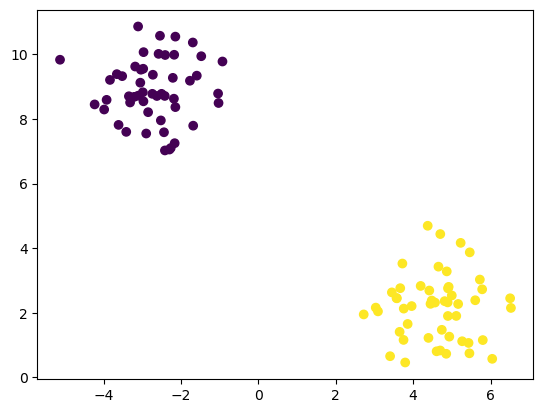

In [76]:
# Zwizualizujmy dataset

def plot_data_2d(points, labels, ax):
    x_coords = points[:, 0]
    y_coords = points[:, 1]

    ax.scatter(x_coords, y_coords, c=labels)

fig, ax = plt.subplots()

plot_data_2d(points, labels, ax)

plt.show()

## Zadanie nr 1 (2 punkty)
Dokończ poniższą implementację Perceptrona.

In [77]:
import numpy as np

class Perceptron:
    def __init__(self, data_dim: int):
        self.data_dim = data_dim
        self.weights = np.zeros(data_dim)

    def predict(self, x: np.ndarray) -> bool:
        activation = np.dot(self.weights, x)
        return activation >= 0

    def train(self, X: np.ndarray, y: np.ndarray, steps: int):
        n_samples, data_dim = X.shape

        if data_dim != self.data_dim:
            raise ValueError("Data dimension mismatch")

        for _ in range(steps):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                error = yi - int(prediction)
                self.weights += error * xi


Teraz możemy go wytrenować.

In [78]:
perceptron = Perceptron(data_dim=2)
perceptron.train(points, labels, steps=100)

Zwizualizujmy teraz wyniki klasyfikacji.

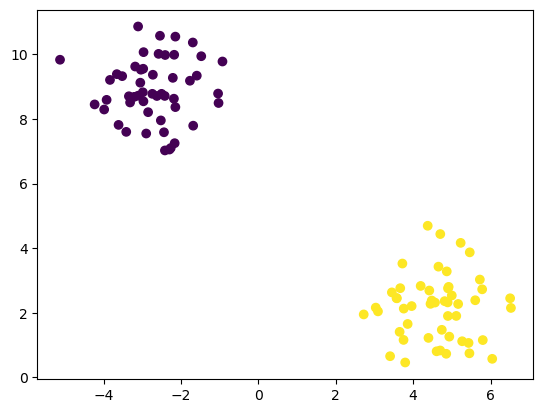

In [79]:
def visualise_perceptron_prediction(perceptron, data_points, ax):
    predictions = [perceptron.predict(point) for point in data_points]
    predictions = [int(pred) for pred in predictions]
    predictions = np.array(predictions)

    x_coords = data_points[:, 0]
    y_coords = data_points[:, 1]

    ax.scatter(x_coords, y_coords, c=predictions)

    return ax 

fig, ax = plt.subplots(nrows=1, ncols=1)

visualise_perceptron_prediction(perceptron, points, ax)

plt.show()

### Obserwacja

Perceptron oblicza wartość funkcji $x_1 \cdot w_1 + x_2 \cdot w_2 + \dots + x_n \cdot w_n$. Jest to funkcja liniowa. Jak wiemy również, przyporządkowuje on do klasy 0 wtedy, gdy:

$$

x_1 \cdot w_1 + x_2 \cdot w_2 + \dots + x_n \cdot w_n < 0

$$ 

Czyli decision boundary jest dane funkcją liniową. Możemy ją zwizualizować.

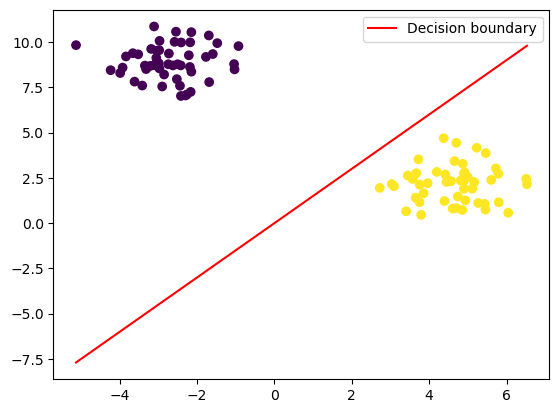

In [80]:
def visualise_decision_boundary_2d(perceptron, ax, min_x = -5, max_x = 5):
    
    # Ax + By = 0
    weights = perceptron.weights # [A, B]

    A = weights[0]
    B = weights[1]

    if B == 0: 
        ax.axvline(x=-A, color='red', label='Decision boundary')
        return

    # y = (-A/B) x

    x_coeff = -A / B

    x = np.linspace(min_x, max_x, 100)
    y = x * x_coeff

    ax.plot(x, y, color='red', label='Decision boundary')

fig, ax = plt.subplots(nrows=1, ncols=1)
min_x, max_x = np.min(points[:, 0]), np.max(points[:, 0])

plot_data_2d(points, labels, ax)
visualise_decision_boundary_2d(perceptron, ax, min_x, max_x)

plt.legend()
plt.show()

### Wady obecnej implementacji

Niestety, obecna implementacja perceptrona nie jest bez wad. Zobaczmy co się stanie dla nieco innego (ale również prostego) zbioru danych.

In [81]:
points = np.array(
    [
    [0, 0.75], # label: 0
    [1, 0.75], # label: 0 
    [2, 0.75], # label: 0
    [0, 1.5], # label: 1
    [1, 1.5], # label: 1
    [2, 1.5]  # label: 1
    ]
)

labels = np.array(
    [0, 0, 0, 1, 1, 1]
)

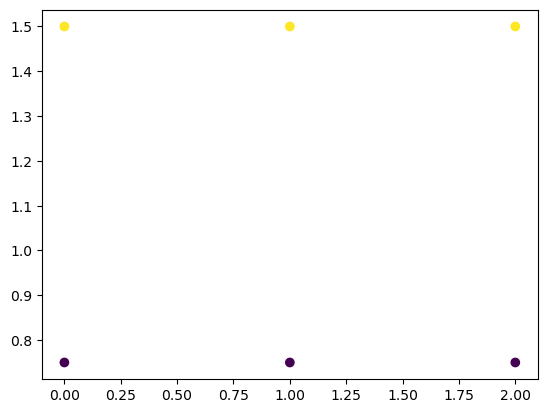

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1)

plot_data_2d(points, labels, ax)

plt.show()

In [83]:
perceptron = Perceptron(data_dim=2)
perceptron.train(points, labels, steps=100)

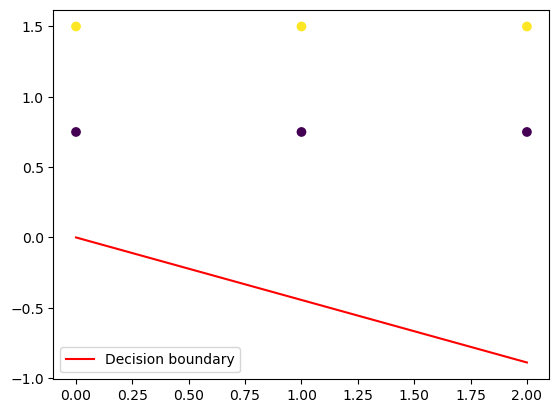

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=1)

plot_data_2d(points, labels, ax)
visualise_decision_boundary_2d(perceptron, ax, min_x=0, max_x=2)

plt.legend()
plt.show()

Dlaczego tak jest? Otóż zauważmy, że obecnie decision boundary jest funkcją liniową postaci

$$ w_1 x + w_2 y = 0 $$

lub 

$$ y = -\frac{w_1}{w_2} x $$

Brakuje nam wyrazu wolnego, a w konsekwencji decision boundary oprócz tego że jest funkcją liniową, to musi przechodzić przez punkt $(0, 0)$.

### Zadanie nr 2 (1 punkt)

Popraw implementację perceptrona tak, by decision boundary mógł być dowolną funkcją liniową. Będzie wymagało to dodania dodatkowego parametru $b$. Funkcja obliczana przez perceptron będzie wówczas postaci:

$$
y = X \odot W + b
$$

Update'owanie wag pozostanie bez zmian, natomiast do parametru $b$ będziemy po prostu dodawać lub odejmować $1$ w zależnie od sytuacji. Przetestuj model na powyższych danych.

In [85]:
import numpy as np

class PerceptronWithBias:
    def __init__(self, data_dim: int):
        self.data_dim = data_dim
        self.weights = np.zeros(data_dim)
        self.bias = 0  # bias jako liczba całkowita

    def predict(self, x: np.ndarray) -> bool:
        activation = np.dot(self.weights, x) + self.bias
        return activation >= 0

    def train(self, X: np.ndarray, y: np.ndarray, steps: int):
        n_samples, data_dim = X.shape

        if data_dim != self.data_dim:
            raise ValueError("Data dimension mismatch")

        for _ in range(steps):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                error = yi - int(prediction)
                if error != 0:
                    self.weights += error * xi
                    self.bias += error  # tylko dodajemy/odejmujemy 1


Zanim zwizualizujemy działanie modelu, zmienimy implementację funkcji od wizualizacji tak, by uwzględniała dodatkowy parametr $b$.

In [86]:
def visualise_decision_boundary_2d(perceptron, ax, min_x = -5, max_x = 5):
    
    # Ax + By + C = 0
    weights = perceptron.weights # [A, B]

    A = weights[0]
    B = weights[1]

    if B == 0: 
        ax.axvline(x=-A, color='red', label='Decision boundary')
        return

    try: 
        C = perceptron.bias
    except AttributeError:
        C = 0

    # y = (-A/B) x - C/B

    x_coeff = -A / B

    x = np.linspace(min_x, max_x, 100)
    y = x * x_coeff - C / B

    ax.plot(x, y, color='red', label='Decision boundary')

Weights: [0.   0.75]
Bias: -1


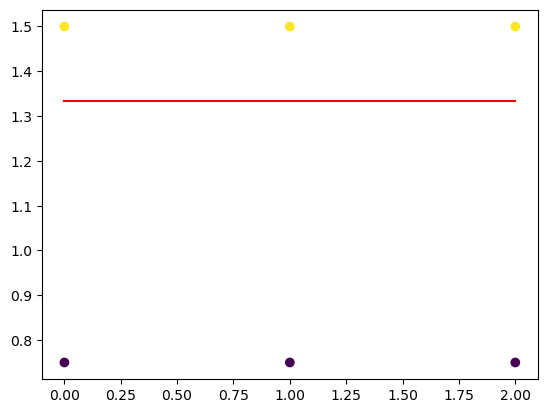

In [87]:
perceptron = PerceptronWithBias(data_dim=2)
perceptron.train(points, labels, steps=100)

fig, ax = plt.subplots(nrows=1, ncols=1)

plot_data_2d(points, labels, ax)
visualise_decision_boundary_2d(perceptron, ax, min_x=0, max_x=2)

print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)

Jest natomiast pewien oczywisty problem z obecną implementacją: bias jest aktualizowany zawsze o $1$, w związku z czym może przybrać tylko wartości całkowite. 

Jeśli dobierzemy dane nieco złośliwiej, to perceptron się niczego nie nauczy.

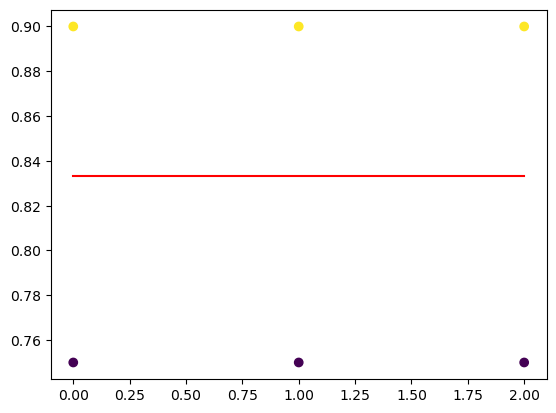

In [88]:
points = np.array(
    [
    [0, 0.75], # label: 0
    [1, 0.75], # label: 0 
    [2, 0.75], # label: 0
    [0, 0.9], # label: 1
    [1, 0.9], # label: 1
    [2, 0.9]  # label: 1
    ]
)

labels = np.array(
    [0, 0, 0, 1, 1, 1]
)

perceptron = PerceptronWithBias(data_dim=2)
perceptron.train(points, labels, steps=100)

fig, ax = plt.subplots(nrows=1, ncols=1)

plot_data_2d(points, labels, ax)
visualise_decision_boundary_2d(perceptron, ax, min_x=0, max_x=2)

### Zadanie 3 (1 punkt)

By radzić sobie z problemem takim jak ten, wprowadza się hiperparametr $\eta$, nazywany jako **learning rate**. Jest on liczbą rzeczywistą, która "steruje" tym jak bardzo "dotkliwe" mają być update'y wag. Z jego zastosowaniem, update wag w perceptronie będzie wyglądał tak:

$$
W := W \pm \eta \cdot X
$$

a biasu:

$$
b := b \pm \eta
$$

Twoim zadaniem jest dodać learning rate do implementacji perceptronu. Przetestuj model na powyższych danych.

In [89]:
import numpy as np

class PerceptronWithBiasAndLearningRate:
    def __init__(self, data_dim: int):
        self.data_dim = data_dim
        self.weights = np.zeros(data_dim)
        self.bias = 0.0  # teraz float

    def predict(self, x: np.ndarray) -> bool:
        activation = np.dot(self.weights, x) + self.bias
        return activation >= 0

    def train(self, X: np.ndarray, y: np.ndarray, steps: int, learning_rate: float):
        n_samples, data_dim = X.shape

        if data_dim != self.data_dim:
            raise ValueError("Data dimension mismatch")

        for _ in range(steps):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                error = yi - int(prediction)
                if error != 0:
                    self.weights += learning_rate * error * xi
                    self.bias += learning_rate * error


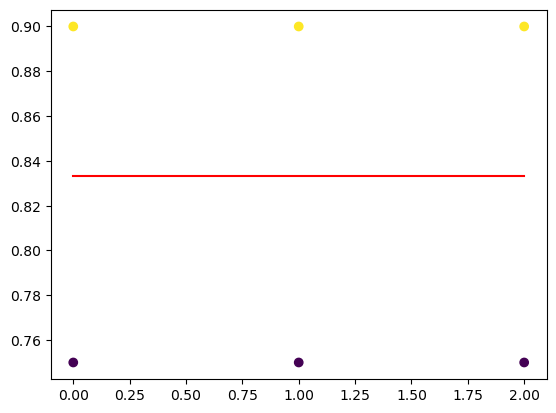

In [90]:
perceptron = PerceptronWithBiasAndLearningRate(data_dim=2)
perceptron.train(points, labels, steps=1000, learning_rate=0.1)

fig, ax = plt.subplots(nrows=1, ncols=1)

plot_data_2d(points, labels, ax)
visualise_decision_boundary_2d(perceptron, ax, min_x=0, max_x=2)

plt.show()

Mamy perceptron który działa! Spróbujmy teraz zastosować go do przewidywania wyniku prostej funkcji logicznej: XOR. Załączamy tabelkę wartościowania funkcji XOR.

|$x_1$|$x_2$|$x_1$ xor $x_2$|
|:-:|:-:|:-:|
|1|1|0|
|1|0|1|
|0|1|1|
|0|0|0|

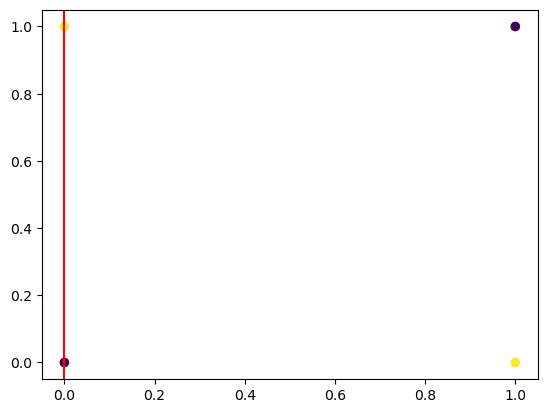

In [91]:
points = np.array(
    [
        [1, 1], # label: 0
        [1, 0], # label: 1
        [0, 1], # label: 1
        [0, 0]  # label: 0
    ]
)

labels = np.array(
    [0, 1, 1, 0]
)

perceptron = PerceptronWithBiasAndLearningRate(data_dim=2)

perceptron.train(points, labels, steps=1000, learning_rate=0.1)

fig, ax = plt.subplots(nrows=1, ncols=1)

plot_data_2d(points, labels, ax)
visualise_decision_boundary_2d(perceptron, ax, min_x=0, max_x=1)

Niestety: te 2 klasy nie są liniowo separowalne i perceptron tutaj sobie nie poradzi :(. Na szczęście mamy na to sposób -- skoro jeden perceptron nie podołał, to użyjemy wielu!

## Multi-layer Perceptron (MLP)

Perceptron wielowarstwowy jest typem sieci neuronowej, która składa się z wielu "warstw" równoległych do siebie perceptronów. Intuicyjnie, w obrębie danej warstwy każdy perceptron "dostaje" na wejście to samo. Następnie wyjścia wszystkich perceptronów z danej warstwy przekazywane są perceptronowi z kolejnej warstwy.

Rozmiarem warstwy będziemy nazywać liczbę równoległych do siebie perceptronów w jej obrębie. 

Wyjściem perceptronu wielowarstwowego jest wyjście z ostatniej warstwy.

Poniższa grafika przedstawia dwuwarstwowy perceptron, w którym: 

* Wejście jest wektorem w $(x_1, x_2, x_3) \in \mathbb{R}^3$;
* pierwsza warstwa ma rozmiar 3 (więc jej wyjściem będzie wektor  $ (y_1, y_2, y_3) \in \mathbb{R}^3$)
* druga warstwa ma rozmiar 1, a jej wyjściem jest wektor $(y, ) \in \mathbb{R}^1$.

<p align="center">
<img src="images/mlp.png" alt="Perceptron wielowarstwowy" width="300"/>
</p>

### Notacja

Zauważmy, że podczas gdy intuicyjnie koncept perceptrona wielowarstwowego nie jest specjalnie skomplikowany, notacyjnie sprawy się pogorszyły -- mamy wiele perceptronów i każdy coś sobie oblicza. 

Z tego powodu zmieńmy notację która jest na powyższym rysunku na następującą:

* $s^{(i)}$ to rozmiar (czyli liczba perceptronów) w $i$-tej warstwie.
* $W^{(i)}_{a, \; b}$ to $a$-ta waga w $b$-tym perceptronie w $i$-tej warstwie. 
* $x^{(i)}_{j}$ to $j$-ty element wektora z danymi dla perceptronów w $i$-tej warstwie.
* $y^{(i)}_{j}$ to $j$-ty element wektora stanowiącymi wyjścia perceptronów z $i$-tej warstwy.

"Przepiszmy" sytuację z powyższego obrazka na tę notację, byśmy się upewnili że to rozumiemy: 

* Wektor z wejściami do sieci oznaczymy jako $x^{(1)} = \begin{bmatrix}x^{(1)}_1 \; x^{(1)}_2 \; x^{(1)}_3 \end{bmatrix}$
* Pierwszy perceptron z pierwszej warstwy wykona obliczenie $y^{(1)}_{1} = \sum^3_{i=1} x^{(1)}_{i} \cdot W^{(1)}_{i, \; 1} = x^{(1)} \odot W^{(1)}_{:, \; 1}$ 
* Drugi perceptron z drugiej warstwy wykona obliczenie $y^{(1)}_{2} = \sum^3_{i=1} x^{(1)}_{i} \cdot W^{(1)}_{i, \; 2} = x^{(1)} \odot W^{(1)}_{:, \; 2}$ 
* Trzeci perceptron wykona analogiczne obliczenie.
* Wektor $y^{(1)} = \begin{bmatrix}y^{(1)}_1 \; y^{(1)}_2 \; y^{(1)}_3 \end{bmatrix}$ to jednocześnie wejście do drugiej warstwy, czyli $y^{(1)} = x^{(2)}$.
* Pojedynczy perceptron z drugiej warstwy wykona obliczenie $y^{(2)}_1 = x^{(2)} \odot W^{(2)}_{:, \; 1}$ 

Poza tym:
* $s^{(1)} = 3$
* $s^{(2)} = 1$

(Autor notebooka z góry przeprasza wszystkich za "przeczołganie" przez przykład notacji, ale formalne zanotowanie działania MLP jest czymś, co co najmniej raz w życiu trzeba zrobić.)

Zauważmy, że rozpatrywanie pojedynczych perceptronów w obrębie danej warstwy jest... smutne. Na szczęście z ratunkiem przychodzi nam następująca obserwacja:

$$

\begin{align*}
    \begin{bmatrix}
        x^{(i)}_1 & x^{(i)}_2 & x^{(i)}_3 \; \dots \; x^{(i)}_{s^{(i-1)}} \\
    \end{bmatrix} &\cdot \begin{bmatrix}
        W^{(i)}_{1, \; 1} & W^{(i)}_{1, \; 2} & \dots & W^{(i)}_{1,\; s^{(i)}}\\
        W^{(i)}_{2, \; 1} & W^{(i)}_{2, \; 2} & \dots & W^{(i)}_{2,\; s^{(i)}} \\ 
        \vdots & \vdots & \ddots & \vdots \\ 
        W^{(i)}_{s^{(i-1)}, \; 1} & W^{(i)}_{s^{(i-1)}, \; 2} & \dots & W^{(i)}_{s^{(i-1)}, \; s^{(i)}}
    \end{bmatrix} \\ &= 
    \begin{bmatrix}
    y^{(i)}_1 & y^{(i)}_2 & \dots & y^{(i)}_{s^{(i)}}
    \end{bmatrix}
\end{align*}

$$

Innymi słowy: wyjście $i$-tej warstwy to wektor który uzyskujemy po prostu mnożąc wektor wejścia z macierzą wag. I tyle. Tym samym wszystko to jesteśmy w stanie bardzo prosto zaimplementować w Pythonie:

In [92]:
class MLPLayer:
    def __init__(self, in_dim: int, out_dim: int):
        self.weights = np.random.randn(in_dim, out_dim)
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
    def forward(self, x: np.ndarray) -> np.ndarray:
        # x shape: (1, in_dim)
        # weights shape: (in_dim, out_dim)
        return np.matmul(x, self.weights)

Uwaga: (bardzo uparcie) będziemy zakładać, że wejścia do warstw mają "sztuczny" wymiar (1,) z przodu -- innymi słowy, tak naprawdę nie są wektorami, a macierzami o wymiarach $1 \times \mathrm{długość wejścia}$. Nie wchodźmy w to dlaczego tak robimy -- dowiemy się na końcu Notebooka (gdy to założenie pozwoli nam na osiągnięcie czegoś _fajnego_).

Omawiany przykład w takiej sytuacji może doczekać się prostej implementacji.

In [93]:
layer_1 = MLPLayer(in_dim=3, out_dim=3)
layer_2 = MLPLayer(in_dim=3, out_dim=1)

x_1 = np.array([[1, 2, 3]])

y_1 = layer_1.forward(x_1)
y_2 = layer_2.forward(y_1)

print(y_2.item())


14.697404542906058


## Zadanie nr 4 (1 punkt)

W przypadku perceptrona wprowadziliśmy sobie w pewnym momencie _bias_. Nasza implementacja MLP go pomija. Twoim zadaniem jest to naprawić! 

In [94]:
import numpy as np

class MLPLayerWithBias(MLPLayer):
    def __init__(self, in_dim: int, out_dim: int):
        super().__init__(in_dim, out_dim)
        self.bias = np.random.randn(1, out_dim)  # shape: (1, out_dim)

    def forward(self, x: np.ndarray) -> np.ndarray:
        # x: shape (1, in_dim)
        # weights: shape (in_dim, out_dim)
        # bias: shape (1, out_dim)
        return np.matmul(x, self.weights) + self.bias


Rozwiązanie możemy przetestować.

In [95]:
layer_1 = MLPLayerWithBias(in_dim=3, out_dim=3)

layer_1.weights = np.array([[1, 2, 3],
                            [1, 2, 3],
                            [1, 2, 3]])

layer_1.bias = np.array([[10, 20, 30]])

# Pierwszy perceptron z wagami (1, 1, 1) i biasem 10
# Drugi perceptron z wagami (2, 2, 2) i biasem 20
# Trzeci perceptron z wagami (3, 3, 3) i biasem 30

data = np.array([[1, 1, 1]])
output = np.squeeze(layer_1.forward(data))

assert output[0] == 13 # 1*1 + 1*1 + 1*1 + 10
assert output[1] == 26 # 1*2 + 1*2 + 1*2 + 20
assert output[2] == 39 # 1*3 + 1*3 + 1*3 + 30


## Zaraz zaraz

Zauważmy, że operacje które wykonuje nasze MLP (bez biasu) możemy zapisać jako: 

$$ 
y^{(n)} = (((x^{(1)} \cdot W^{(1)}) \cdot W^{(2)}) \cdot \dots) \cdot W^{(n)}
$$

gdzie $n$ to liczba warstw.

Mnożenie macierzy jest łączne, więc niezależnie jak ponawiasujemy otrzymamy ten sam wynik, więc to samo możemy zapisać jako: 

$$ 
y^{(n)} = x^{(1)} \cdot (W^{(1)} \cdot W^{(2)} \cdot \dots \cdot W^{(n)})
$$

Wynik mnożenia wszystkich tych macierzy to jakaś macierz $W'$, więc finalnie otrzymujemy

$$
y^{(n)} = x^{(1)} \cdot W'
$$

Co tak naprawdę kolapsuje nam dowolnie wielowarstwowe MLP do MLP z jedną warstwą, o rozmiarze takim jaki był rozmiar ostatniej warstwy. Dla klasyfikacji binarnej rozpatrujemy obecnie sytuacje gdzie ostatnia warstwa ma rozmiar 1, więc to wszystko możemy zapisać jako... perceptron.

**A to oznacza że jeśli perceptron nie będzie "umieć" czegoś się nauczyć, to takie MLP również tego nie będzie "umieć"**.

I tak: jeśli dodamy tutaj bias, to sytuacja się nie poprawi (zweryfikowanie tego faktu pozostawiamy jako ćwiczenie dla czytelnika).

Czy to koniec tego notebooka? 

(nie)

Powitajmy to, co nas ratuje w tej sytuacji: **funkcje aktywacji**!

<p align="center">
<img src="images/activation.png" alt="Perceptron z funkcjami aktywacji" width="600"/>
</p>


W porównaniu do poprzedniego Perceptrona, "wyniki" działania poszczególnych warstw przepuszczamy jeszcze przez pewne funkcje. Wymagamy od nich efektywnie 2 rzeczy:

* Niebycia wielomianami (w szczególności: niebycia funkcjami liniowymi)
* Różniczkowalności (to się przyda za chwilę do uczenia)

Przykładem funkcji która spełnia oba te warunki jest tak zwane **ReLU** (ang. *rectified linear unit*):

$$
\mathrm{ReLU}(x) = \mathrm{max}(x, 0)
$$

<p align="center">
<img src="images/relu.png" alt="Wykres funkcji ReLU" width="300"/>
</p>

Tak naprawdę ta funkcja nie jest różniczkowalna w zerze, ale nie ma to dla nas znaczenia. Jej pochodna to $1$ jeśli $x>0$ i $0$ jeśli $x<0$; (do naszych celów, o których za chwilę) możemy założyć że pochodna w zerze to $0$ (lub $1$) i w gruncie rzeczy nic się nie stanie.

Można udowodnić, że MLP o takiej architekturze są w stanie przybliżyć niemal dowolną "sensowną" funkcję. W szczególności: wprowadzenie tego typu funkcji aktywacji "psuje" argument redukujący MLP do Perceptrona, który padł wcześniej.

Zaimplementujemy funkcję ReLU w kodzie.

In [96]:
class ReLU:
    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.maximum(x, 0)

Szybko poszło.

In [97]:
relu = ReLU()
input_data = np.array([[-1, 0, 1]])

output = relu.forward(input_data)

print(output)

[[0 0 1]]


Istnieją również inne funkcje aktywacji. Jedną z takich funkcji jest **sigmoid**, dany wzorem: 

$$ 
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Jego wykres przedstawia się następująco: 

<p align="center">
<img src="images/sigmoid.png" alt="Wykres funkcji sigmoid" width="300"/>
</p>

In [98]:
class Sigmoid:
    def forward(self, x: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-x))

In [99]:
sigmoid = Sigmoid()

input_data = np.array([[-10, 0, 10]])
output = sigmoid.forward(input_data)

assert np.allclose(output, [0, 0.5, 1], atol=1e-4)
assert np.allclose(sigmoid.forward(np.array([[1]])), 0.73105858)

W praktyce, w przypadku klasyfikacji binarnej sigmoidę stosujemy do wyjścia z "ostatniego" perceptrona. W ten sposób nasza sieć zwraca wartości z przedziału $(0, 1)$ które możemy prosto interpretować jako jej "pewność" w wyborze klasy numer 1. 

Przykładowo: jeśli sieć zwróci wynik $0.001$ będziemy to interpretować jako bardzo wysoką pewność w wyborze klasy $0$, a jeśli wybierze $0.999$ -- jako bardzo wysoką pewność w wyborze klasy $1$. Z kolei zaś $0.4$ można potraktować jako klasę $0$, a $0.6$ jako klasę 1 -- w obu przypadkach z istotnie niższym "przekonaniem" modelu. 

Pozbierajmy wszystko co mamy w jedną sieć.

In [100]:
layer_1 = MLPLayerWithBias(in_dim=3, out_dim=3)
relu = ReLU()
layer_2 = MLPLayerWithBias(in_dim=3, out_dim=1)
sigmoid = Sigmoid()

x_1 = np.array([[1, 2, 3]])
y_1 = layer_1.forward(x_1)
z_1 = relu.forward(y_1)

y_2 = layer_2.forward(z_1)
z_2 = sigmoid.forward(y_2)

print(z_2.item())

0.00849263508902534


Kod ten implementuje sieć z tej ilustracji: 

<p align="center">
<img src="images/activation.png" alt="Perceptron z funkcjami aktywacji" width="600"/>
</p>

(którą już widzieliśmy).

Funkcją $f$ na tym obrazku jest $\mathrm{ReLU}$, a funkcją $g$ -- sigmoid.

## Trening 

Wiemy już jak działa MLP -- teraz pora na tę trudniejszą część, czyli zrozumienie algorytmu nauczania tej sieci. Niestety, perceptron learning który działał dla jednego perceptrona tutaj (siłą rzeczy) nie zadziała; musimy podejść do tego tematu inaczej. 

### Funkcja straty

Na początek zdefiniujemy coś takiego jak **funkcja straty**. Intuicyjnie, będzie ona mówić jak źle "idzie" przewidywanie określonej klasy.

Przykładem takiej funkcji (i tym czego będziemy używać) jest błąd średniokwadratowy (mean squared error -- MSE). Definiowany jest on dla par wektorów $Y, \hat{Y} \in \mathbb{R}^n$ i prezentuje się następująco: 

$$
    \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


W naszym przypadku (klasyfikacja binarna) output modelu jest wektorem $\hat{Y} \in \mathbb{R}^1$, a więc strata średniokwadratowa dla naszego modelu będzie wynosić:

$$
(Y - \hat{Y})^2
$$

gdzie $Y$ to ground truth label danej klasy.

Przykładowo:

* Jeśli dla jakiegoś zestawu danych model otrzyma $0.8$, a "poprawna odpowiedź" co do klasy to $1$, to funkcja straty w tym przypadku wyniesie $(1 - 0.8)^2 = 0.04$
* Jeśli dla jakiegoś zestawu danych model otrzyma $0.99$, a "poprawna odpowiedź" co do klasy to $0$, to funkcja straty w tym przypadku wyniesie $(0 - 0.99)^2 = 0.99^2$

**Uwaga.** Od funkcji straty będziemy żądać, żeby była różniczkowalna ze względu na $\hat{Y}$ (zaraz zobaczymy dlaczego).

Ogólnie: widać, że im gorzej model się "spisuje" tym większa będzie jego funkcja straty. Analogicznie -- im lepiej mu idzie, tym niższa ona będzie.

In [101]:
class MSE:
    def forward(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        return np.mean((y_true - y_pred) ** 2)

### Nasz cel

Chcemy znaleźć taki zbiór wag $\{ W^{(1)}, W^{(2)}, \dots, W^{(n)} \}$ że sieć dla niego minimalizuje funkcję straty na zbiorze uczącym. 

Do tego celu użyjemy metody gradientowej. Parametry naszej sieci będziemy "przesuwać" przeciwnie do kierunku gradientu. Innymi słowy, każdą wagę będziemy update'ować: 

$$
W^{(i)}_{a \; b} := W^{(i)}_{a \; b} - \eta \cdot \frac{\partial L}{\partial W^{(i)}_{a \; b}}
$$

gdzie $L$ jest funkcją straty (w naszym przypadku: MSE), a $\eta$ to *learning rate*.

Czyli, w gruncie rzeczy: możemy podejść do tego tak analogicznie jak w perceptron learning (losujemy przykład, "przepuszczamy" przez model), tylko że zamiast sprawdzać poprawność liczymy funkcję straty, a każdą wagę update'ujemy bazując na pochodnej funkcji straty po niej samej. Podobnie jak w Perceptron Learning występuje tutaj parametr $\eta$ -- z bardzo analogicznych przyczyn.

Wszystko fajnie, ale jak policzyć te pochodne? 

**Zastanówmy się jak zrobić to źle**: możemy policzyć pochodne cząstkowe z definicji dla każdej wagi. To znaczy: aby obliczyć $\frac{\partial L}{\partial W^{(i)}_{a \; b}}$:

* obliczamy wartośc funkcji straty -- nazwijmy ją $E_1$
* obliczamy funkcję straty dla tej samej sieci i dla tego samego przykładu, ale wykonujemy podstawienie $\partial W^{(i)}_{a \; b} := \partial W^{(i)}_{a \; b} + \varepsilon$, gdzie $\varepsilon$ to jakaś bardzo mała liczba. Tak otrzymaną wartość nazwijmy ją $E_2$
* z definicji pochodnej cząstkowej, $\frac{\partial L}{\partial W^{(i)}_{a \; b}} \approx \frac{E_2 - E_1}{\varepsilon}$

Jest to bardzo niewydajna metoda: dla każdej wagi musimy wykonać dodatkową ewaluację danych na modelu by wykonać *jeden krok*. Jeśli mamy miliony wag w naszym MLP, nie skończy się to dobrze.

Możemy jednak zobaczyć taki kod "w akcji" by przekonać się, że faktycznie działa (dla małych sieci). Spróbujemy pokonać już teraz problem XOR (który -- przypomnijmy -- pokonał Perceptron).

In [102]:
# Brzydki kod, ale nie ma sensu pisać ładniejszego -- i tak nie należy tak robić :)

layer_1 = MLPLayerWithBias(in_dim=2, out_dim=3)
relu = ReLU()
layer_2 = MLPLayerWithBias(in_dim=3, out_dim=1)
sigmoid = Sigmoid()

mse = MSE()

input_data = np.array(
[
    [1, 1], # 0 
    [1, 0], # 1
    [0, 1], # 1
    [0, 0]  # 0
])

output_data = np.array([[0], [1], [1], [0]])

In [103]:
def predict_example(x: np.ndarray) -> np.ndarray:
    y_1 = layer_1.forward(x)
    z_1 = relu.forward(y_1)

    y_2 = layer_2.forward(z_1)
    z_2 = sigmoid.forward(y_2)
    
    return z_2

In [104]:
def get_loss_for_example(x: np.ndarray, y_true: np.ndarray) -> np.ndarray:
    y_pred = predict_example(x)

    return mse.forward(y_true=y_true, y_pred=y_pred)

In [105]:
def get_gradient(x: np.ndarray, y_true: np.ndarray) -> np.ndarray:
    eps = 1e-4
    base_loss = get_loss_for_example(x, y_true)

    layer_1_weight_gradients = np.zeros_like(layer_1.weights)
    layer_2_weight_gradients = np.zeros_like(layer_2.weights)

    layer_1_bias_gradients = np.zeros_like(layer_1.bias)
    layer_2_bias_gradients = np.zeros_like(layer_2.bias)

    # Przepraszam.

    for i in range(layer_1.weights.shape[0]):
        for j in range(layer_1.weights.shape[1]):
            layer_1.weights[i, j] += eps
            new_loss = get_loss_for_example(x, y_true)
            layer_1.weights[i, j] -= eps

            layer_1_weight_gradients[i, j] = (new_loss - base_loss) / eps
    
    for i in range(layer_2.weights.shape[0]):
        for j in range(layer_2.weights.shape[1]):
            layer_2.weights[i, j] += eps
            new_loss = get_loss_for_example(x, y_true)
            layer_2.weights[i, j] -= eps

            layer_2_weight_gradients[i, j] = (new_loss - base_loss) / eps

    for i in range(layer_1.bias.shape[1]):
        layer_1.bias[0, i] += eps
        new_loss = get_loss_for_example(x, y_true)
        layer_1.bias[0, i] -= eps

        layer_1_bias_gradients[0, i] = (new_loss - base_loss) / eps
    
    for i in range(layer_2.bias.shape[1]):
        layer_2.bias[0, i] += eps
        new_loss = get_loss_for_example(x, y_true)
        layer_2.bias[0, i] -= eps

        layer_2_bias_gradients[0, i] = (new_loss - base_loss) / eps

    
    return layer_1_weight_gradients, layer_2_weight_gradients, layer_1_bias_gradients, layer_2_bias_gradients, base_loss


## Zadanie nr 5 (2 punkty)
Dokończ implementację poniższego kodu, którego celem jest nauczenie sieci neuronowej złożonej z dwóch warstw liniowych i dwóch nieliniowych funkcji aktywacji.

Wskazówka: Przyda się funkcja _get_gradient_.

In [106]:
learning_rate = 0.1
epochs = 1000  # liczba epok

for epoch in range(epochs):
    average_loss = 0

    for x, y_true in zip(input_data, output_data):
        # Oblicz gradienty numeryczne i stratę
        (
            dW1, dW2,
            db1, db2,
            loss
        ) = get_gradient(x, y_true)

        # Aktualizacja wag i biasów
        layer_1.weights -= learning_rate * dW1
        layer_2.weights -= learning_rate * dW2
        layer_1.bias    -= learning_rate * db1
        layer_2.bias    -= learning_rate * db2

        average_loss += loss

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, average loss: {average_loss / len(input_data)}")


Epoch 0, average loss: 0.3401492931916262
Epoch 100, average loss: 0.1893270845830436
Epoch 200, average loss: 0.17143039265716065
Epoch 300, average loss: 0.1692760322008851
Epoch 400, average loss: 0.1689291370465069
Epoch 500, average loss: 0.16866799152323875
Epoch 600, average loss: 0.16856659470319196
Epoch 700, average loss: 0.16851837239558465
Epoch 800, average loss: 0.16849632490148503
Epoch 900, average loss: 0.1684933143570039


In [107]:
for x in input_data:
    print(f"Prediction for {x}: {predict_example(x)}")

Prediction for [1 1]: [[0.33243928]]
Prediction for [1 0]: [[0.33243928]]
Prediction for [0 1]: [[0.97726196]]
Prediction for [0 0]: [[0.33243928]]


Czyli udało nam się nauczyć MLP które prawidłowo rozwiązuje problem XOR!

Jak już powiedzieliśmy wcześniej -- metoda tego typu jest bardzo niewydajna (zwłaszcza jeśli mamy dużo wag). Na szczęście jednak możemy wyliczać pochodne sprawniej stosując algorytm nazywany **propagacją wsteczną** (ang. *backpropagation*). W dalszej części notebooka zajmiemy się właśnie tym algorytmem.

Żeby zrozumieć ten algorytm, będziemy potrzebowali trochę obliczeń matematycznych. Aby się nie pogubić w tym co się dzieje, przypomnijmy stosowaną notację:

* $s^{(i)}$ to rozmiar (czyli liczba perceptronów) w $i$-tej warstwie.
* $W^{(i)}_{a, \; b}$ to $a$-ta waga w $b$-tym perceptronie w $i$-tej warstwie. 
* $x^{(i)}_{j}$ to $j$-ty element wektora z danymi dla perceptronów w $i$-tej warstwie.
* $y^{(i)}_{j}$ to $j$-ty element wektora **nieaktywowanych** wyjść perceptronów z $i$-tej warstwy.

Oprócz tego (po tym jak wprowadziliśmy notację) pojawiły się również biasy i funkcje aktywacji. Musimy uwzględnić je w notacji:
* $z^{(i)}_{j}$ to $j$-ty element wektora **aktywowanych** wyjść perceptronów z $i$-tej warstwy.
* $b^{(i)}_{j}$ to bias $j$-tego perceptrona w $i$-tej warstwie.
* $f^{(i)}$ to i-ta funkcja aktywacji.
* $L$ to funkcja straty.

Ponadto, oznaczmy przez $n$ liczbę warstw w modelu, tak by $z^{(n)}$ to było wyjście z ostatniej warstwy.

Zatem:

$$
y^{(i)} = x^{(i)} \cdot W^{(i)} + b^{(i)}
$$

$$
z^{(i)} = f^{(i)}(y^{(i)}) 
$$

$$
x^{(i+1)} = z^{(i)}
$$

Będziemy teraz próbowali liczyć pochodne funkcji straty po różnych wartościach obliczanych przez model, licząc że w ten sposób uda nam się "dojść" do wzoru na pochodną funkcji straty po wagach i biasach (bo tego szukamy).

Zauważmy, że dla każdego $j$, $\frac{\partial L}{\partial z^{(i)}_j}$ mamy za darmo, o ile funkcja straty jest różniczkowalna (i mamy zwarty wzór na jej pochodną w dowolnym punkcie).

W przypadku MSE i $z^{(i)} \in \mathbb{R}^m$ mamy: 

$$
\begin{align*}
    \frac{\partial L}{\partial z^{(i)}_j} =& \\
    \frac{\partial}{\partial z^{(i)}_j} \frac{1}{m} \sum_{k=1}^{m} (y_{\mathrm{true}_k} - z^{(i)}_k)^2 &= \\
    \frac{\partial}{\partial z^{(i)}_j} \frac{1}{m} \left(\left(\sum_{k=1 \;;\; k \neq j}^{m} (y_{\mathrm{true}_k} - z^{(i)}_k)^2 \right) + (y_{\mathrm{true}_j} - z^{(i)}_j)^2 \right) &= \\
    \frac{1}{m} \frac{\partial}{\partial z^{(i)}_j} (y_{\mathrm{true}_j} - z^{(i)}_j)^2 &= \\
    -\frac{2}{m} (y_{\mathrm{true}_j} - z^{(i)}_j)
\end{align*}
$$

U nas $m=1$, jako że zakładamy że w ostatniej warstwie mamy tylko jeden perceptron, skąd dochodzimy do:

$$
\frac{\partial L}{\partial z^{(i)}_1} = -2 (y_{\mathrm{true}_1} - z^{(i)}_1)
$$

Zapis ten jeszcze można uprościć, bo indeksowanie jednoelementowych wektorów w matematyce może zaciemniać obraz (czyli po prostu założymy że jednoelementowy wektor to skalar)

$$
\frac{\partial L}{\partial z^{(i)}} = -2 (y_{\mathrm{true}} - z^{(i)})
$$


Dobra, to jeszcze nie wydaje się specjalnie użyteczne, ale coś dostaliśmy. Zmieńmy implementację funkcji straty tak, by potrafiła liczyć swój gradient. To się jeszcze kiedyś przyda :). 

"Umiejętność liczenia gradientu" będziemy implementować tak, że warstwa będzie sama pamiętać jakie argumenty dostała poprzednio, a metoda `backward` będzie elegancko zwracać gradient, korzystając z tych danych. Obecnie to może wydawać się dziwna decyzja, ale za niedługo się przekonamy że jest ona całkiem wygodna.

In [108]:
class MSE:
    def __init__(self):
        self.recent_y_true = None
        self.recent_y_pred = None

    def forward(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        self.recent_y_true = y_true
        self.recent_y_pred = y_pred

        return np.mean((y_true - y_pred) ** 2)
    
    def backward(self) -> np.ndarray:
        return -2 * (self.recent_y_true - self.recent_y_pred)

Hm, spróbujmy teraz może policzyć 

$$
    \frac{\partial z^{(i)}_j}{\partial y^{(i)}_j}
$$

czyli pochodną aktywowanych wartości po nieaktywowanych wartościach. Przypomnijmy, że:

$$
z^{(i)} = f^{(i)}(y^{(i)}) 
$$

więc: 

$$
    \frac{\partial z^{(i)}}{\partial y^{(i)}} = \frac{\partial}{\partial y^{(i)}_j} f^{(i)}(y^{(i)}_j) 
$$

Skąd też jeśli $f = \mathrm{ReLU}$, to wystarczy skorzystać z tego że znamy wzór na różniczkowanie tej funkcji: 

$$
\frac{\partial z^{(i)}_j}{\partial y^{(i)}_j} = \frac{\partial}{\partial y^{(i)}_j} f^{(i)}(y^{(i)}_j) = \begin{cases}
1 \:\: \text{jeśli} \: y^{(i)}_j \geq 0 \\
0 \:\: \text{wpp.}
\end{cases}
$$

Jeśli $f = \sigma$, to robimy analogicznie (ale korzystamy z brzydszego wzoru na pochodną sigmoida): 

$$
\frac{d}{dx} \sigma(x) = \frac{d}{dx} \frac{1}{1+e^{-x}} = \frac{e^{-x}}{(1+e^{-x})^2}
$$

(wyprowadzenie wzoru na powyższą pochodną jest szybkie -- to zwykła pochodna ilorazu, zostawiamy jako ćwiczenie :))

A zatem:

$$
\frac{\partial z^{(i)}_j}{\partial y^{(i)}_j} = \frac{\partial}{\partial y^{(i)}_j} f^{(i)}(y^{(i)}_j) = \frac{e^{-y^{(i)}_j}}{(1+e^{-y^{(i)}_j})^2}
$$

W pewnym sensie jest to jednak ładniejsze, bo nie trzeba się kejsować :D.

Oczywiście, ktoś może zadać pytanie -- po co myśmy te dwie pochodne wyprowadzali, co my z tego w ogóle mamy? 

Otóż możemy rzucić pewnym zaklęciem o nazwie **pochodna złożenia** (swoją drogą już gdzieś nim rzucaliśmy w tych wyprowadzeniach, ale teraz zrobimy to z fajerwerkami).

Jak pewne wiemy: 

$$
(f(g(x)))' = f'(g(x)) \cdot g'(x)
$$

Okazuje się, że ten sam fakt w notacji Leibniza można wyrazić następująco:

$$
\frac{df}{dx} = \frac{dg}{dx} \cdot \frac{df}{dg}
$$

Przypomnijmy, że do tej pory wyliczyliśmy: 

* $\frac{\partial L}{\partial z^{(i)}_j} = -\frac{2}{m} (y_{\mathrm{true}_j} - z^{(i)}_j)$
* $\frac{\partial z^{(i)}_j}{\partial y^{(i)}_j} = \frac{\partial}{\partial y^{(i)}_j} f^{(i)}(y^{(i)}_j) = \frac{e^{-y^{(i)}_j}}{(1+e^{-y^{(i)}_j})^2}$

W połączeniu z powyższym faktem dostajemy, że jesteśmy w stanie policzyć $\frac{\partial L}{\partial y^{(i)}_j}$:

$$
\frac{\partial L}{\partial y^{(i)}_j} = \frac{\partial z^{(i)}_j}{\partial y^{(i)}_j} \cdot \frac{\partial L}{\partial z^{(i)}_j}
$$

...jakbyśmy z tego byli w stanie policzyć jeszcze pochodne po wagach i biasach to byłoby super.

ale $y^{(i)}$ jest zależne w dosyć prosty sposób od wag i biasów, więc jest nadzieja :D.

Póki co zmieńmy implementacje naszych warstw z funkcjami aktywacji tak, by zapewniały nam informację o $\frac{\partial L}{\partial y^{(i)}_j}$. W tym celu funkcja backward będzie przyjmować jako argument również $\frac{\partial L}{\partial z^{(i)}_j}$, by móc wyliczyć tę wartość.

In [109]:
class ReLU:
    def __init__(self):
        self.recent_y = None
        
    def forward(self, y: np.ndarray) -> np.ndarray:
        self.recent_y = y
        
        return np.maximum(y, 0)
    
    def backward(self, dl_by_dz: np.ndarray) -> np.ndarray:
        # Pochodna ReLU jest równa 1 jeśli y >= 0, 0 wpp. 
        # self.recent_y >= 0 da nam macierz True/False, którą możemy przekonwertować na 1/0
        dz_by_dy = np.ones_like(self.recent_y) * (self.recent_y >= 0)

        return dl_by_dz * dz_by_dy

Zobaczmy to w praktyce.

In [110]:
relu = ReLU()

input_data = np.array([[-1, 1]])

output = relu.forward(input_data)

# Załóżmy, że dl_by_dz było wektorem [1, 1] by prościej było "zobaczyć" pochodne.

print(relu.backward(np.array([[1, 1]])))

[[0 1]]


## Zadanie nr 6 (2 punkt)

Twoim zadaniem jest przeimplementować aktywację sigmoidalną tak, by była w stanie policzyć gradient po sobie.

Przypomnijmy, że dla sigmoidu:

$$
\frac{\partial z^{(i)}_j}{\partial y^{(i)}_j} = \frac{e^{-y^{(i)}_j}}{(1+e^{-y^{(i)}_j})^2}
$$

In [111]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.recent_y = None  # zapamiętane wartości sigmoid(y)

    def forward(self, y: np.ndarray) -> np.ndarray:
        # σ(y) = 1 / (1 + e^(-y))
        self.recent_y = 1 / (1 + np.exp(-y))
        return self.recent_y

    def backward(self, dl_by_dz: np.ndarray) -> np.ndarray:
        # ∂z/∂y = σ(y) * (1 - σ(y))
        sigmoid_derivative = self.recent_y * (1 - self.recent_y)
        return dl_by_dz * sigmoid_derivative


I przetestujmy:

In [112]:
sigmoid = Sigmoid()

input_data = np.array([[-5, -1, 0, 1, 5]])

output = sigmoid.forward(input_data)
gradient = sigmoid.backward(np.array([[1, 1, 1, 1, 1]]))

print(gradient)
assert np.allclose(gradient, [0.006648, 0.196612, 0.25, 0.196612, 0.006648], atol=1e-3)


[[0.00664806 0.19661193 0.25       0.19661193 0.00664806]]


Teraz -- w pewnym sensie -- pora na gwóźdź programu, czyli: 

$$
    \frac{\partial L}{\partial W^{(i)}_{a, \; b}}
$$

Bias zostawiamy na potem (jak zwykle).

Od razu przypomnijmy, że $W^{(i)}_{a, \; b}$ oznacza a-tą wagę w b-tym perceptronie. To intuicyjnie oznacza, że jedyny sposób w który waga ta "wpływa" na finalny wynik to przez jej wpływ na wynik w $b$-tym perceptronie (a więc $y^{(i)}_b$). W połączeniu z faktem dotyczącym pochodnej złożenia, dostajemy:

$$
    \frac{\partial L}{\partial W^{(i)}_{a, \; b}} = \frac{\partial y^{(i)}_b}{\partial W^{(i)}_{a, \; b}} \cdot \frac{\partial L}{\partial y^{(i)}_b}
$$

Drugi czynnik tego iloczynu wiemy już jak policzyć, więc skupmy się na tym pierwszym. Wiemy, że $y^{(i)}_b$ można wyrazić jako iloczyn skalarny z wektorem wag $b$-tego perceptrona:

$y^{(i)}_b = x^{(i)} \odot W^{(i)}_{:, \; b} = \sum_{k=1}^{s^{(i-1)}} x^{(i)}_k \cdot W^{(i)}_{k, \; b} = \left(\sum_{k=1; \;\; k \neq a}^{s^{(i-1)}} x^{(i)}_k \cdot W^{(i)}_{k, \; b} \right) + x^{(i)}_a \cdot W^{(i)}_{a, \; b}$ 

A stąd 

$$
\frac{\partial y^{(i)}_b}{\partial W^{(i)}_{a, \; b}} = \frac{\partial}{\partial W^{(i)}_{a, \; b}} \left(\sum_{k=1; \;\; k \neq a}^{s^{(i-1)}} x^{(i)}_k \cdot W^{(i)}_{k, \; b} \right) + x^{(i)}_a \cdot W^{(i)}_{a, \; b} = \frac{\partial}{\partial W^{(i)}_{a, \; b}} x^{(i)}_a \cdot W^{(i)}_{a, \; b} = x^{(i)}_a
$$

...o kurczę! Z tego mamy, że:

$$

\frac{\partial L}{\partial W^{(i)}_{a, b}} = x^{(i)}_a \cdot \frac{\partial L}{\partial y^{(i)}_b}
$$

I oczywiście: zasadniczo możemy już świętować, bo mamy analityczny wzór na pochodną w tej sytuacji, ale fajnie byłoby obliczyć macierz pochodnych cząstkowych dla wszystkich wag przy pomocy jednej operacji i mieć to z głowy -- a w tej formie to byłoby trochę babrania się mimo wszystko.

Rozwiążemy ten problem wprowadzając nowe oznaczenie (na chwilę): 

niech $dy^{(i)}$ będzie wektorem postaci

$$
dy^{(i)} = 
\begin{bmatrix}
        \frac{\partial L}{\partial y_1^{(i)}} \: \frac{\partial L}{\partial y_2^{(i)}} \: \dots \: \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}} \\
\end{bmatrix}
$$

Jest to postać w której nasze zaimplementowane warstwy zwracają i tak pochodne cząstkowe. Zastanówmy się teraz, czym jest outer product tych dwóch wektorów:

$$
x^{{(i)}} \otimes dy^{(i)}
$$

Jest to macierz.

$$

\begin{bmatrix}
        x^{(i)}_1 & x^{(i)}_2 & x^{(i)}_3 \; \dots \; x^{(i)}_{s^{(i-1)}}
\end{bmatrix}^T

\otimes 

\begin{bmatrix}
        \frac{\partial L}{\partial y_1^{(i)}} \: \frac{\partial L}{\partial y_2^{(i)}} \: \dots \: \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}} \\
\end{bmatrix}

=

\begin{bmatrix}
        x_1^{(i)} \cdot \frac{\partial L}{\partial y_1^{(i)}} & x_1^{(i)} \cdot \frac{\partial L}{\partial y_2^{(i)}} & \dots & x_1^{(i)} \cdot \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}}\\

        x_2^{(i)} \cdot \frac{\partial L}{\partial y_1^{(i)}} & x_2^{(i)} \cdot \frac{\partial L}{\partial y_2^{(i)}} & \dots & x_2^{(i)} \cdot \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}}\\
        \vdots & \vdots & \ddots & \vdots \\ 

        x_{s^{(i-1)}}^{(i)} \cdot \frac{\partial L}{\partial y_1^{(i)}} & x_{s^{(i-1)}}^{(i)} \cdot \frac{\partial L}{\partial y_2^{(i)}} & \dots & x_{s^{(i-1)}}^{(i)} \cdot \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}}\\
\end{bmatrix}

$$

Macierz pochodnych cząstkowych.

$$

\begin{bmatrix}
        x_1^{(i)} \cdot \frac{\partial L}{\partial y_1^{(i)}} & x_1^{(i)} \cdot \frac{\partial L}{\partial y_2^{(i)}} & \dots & x_1^{(i)} \cdot \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}}\\

        x_2^{(i)} \cdot \frac{\partial L}{\partial y_1^{(i)}} & x_2^{(i)} \cdot \frac{\partial L}{\partial y_2^{(i)}} & \dots & x_2^{(i)} \cdot \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}}\\
        \vdots & \vdots & \ddots & \vdots \\ 

        x_{s^{(i-1)}}^{(i)} \cdot \frac{\partial L}{\partial y_1^{(i)}} & x_{s^{(i-1)}}^{(i)} \cdot \frac{\partial L}{\partial y_2^{(i)}} & \dots & x_{s^{(i-1)}}^{(i)} \cdot \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}}\\
\end{bmatrix}

=

\begin{bmatrix}
        \frac{\partial L}{\partial W^{(i)}_{1, \; 1}} & \frac{\partial L}{\partial W^{(i)}_{1, \; 2}} & \dots & \frac{\partial L}{\partial W^{(i)}_{1, \; s^{(i)}}}\\

        \frac{\partial L}{\partial W^{(i)}_{2, \; 1}} & \frac{\partial L}{\partial W^{(i)}_{2, \; 2}} & \dots & \frac{\partial L}{\partial W^{(i)}_{2, \; s^{(i)}}}\\
       
        \vdots & \vdots & \ddots & \vdots \\ 

        \frac{\partial L}{\partial W^{(i)}_{s^{(i-1)}, \; 1}} & \frac{\partial L}{\partial W^{(i)}_{s^{(i-1)}, \; 2}} & \dots & \frac{\partial L}{\partial W^{(i)}_{s^{(i-1)}, \; s^{(i)}}}\\
\end{bmatrix}


$$

Dobra, zaimplementujmy to (ponownie: na początku bez biasów) żeby nie osiwieć. 

In [113]:
class MLPLayer:
    def __init__(self, in_dim: int, out_dim: int):
        self.weights = np.random.randn(in_dim, out_dim)
        
        self.in_dim = in_dim
        self.out_dim = out_dim

        self.recent_x = None
        
    def forward(self, x: np.ndarray) -> np.ndarray:
        # x shape: (1, in_dim)
        # weights shape: (in_dim, out_dim)
        self.recent_x = x

        return np.matmul(x, self.weights)
    
    def backward(self, dl_by_dy: np.ndarray) -> np.ndarray:
        # Żeby policzyć outer product wektorów, możemy użyć zwyczajnego mnożenia macierzy (nasze wektory w numpy są macierzami 1xN)

        # dl_by_dy shape: (1, out_dim)
        # recent_x shape: (1, in_dim) -> transpozycja -> (in_dim, 1) 
        # po pomnożeniu dostaniemy macierz (in_dim, out_dim) o takich samych wymiarach jak wagi -- gradienty wag

        dl_by_dW = np.matmul(self.recent_x.T, dl_by_dy)

        return dl_by_dW 

Powyższa implementacja ma pewne problemy, które będziemy naprawiać później.

Jeszcze sporo nam brakuje by móc uczyć większe sieci typu MLP, ale z tym co już mamy jesteśmy w stanie poradzić sobie z uczeniem jednej warstwy. Bez biasu. Ale nie od razu Kraków zbudowano!

I -- w zasadzie -- jest to dobre miejsce by sobie taki prosty trening nową metodą wykonać -- zobaczyć jak to działa w praktyce. Jako że mamy tylko jedną warstwę, to w zasadzie architekturalnie mamy tylko jeden perceptron z funkcją aktywacji; nauczmy się więc czegoś prostego, liniowego.

In [114]:
input_data = np.array([
    [0.5, 1], # 1 
    [1, 1], # 1
    [0.5, 0], # 0
    [1, 0] # 0
])

labels = np.array([[1], [1], [0], [0]])

In [115]:
layer = MLPLayer(in_dim=2, out_dim=1)
activation = Sigmoid()
loss = MSE()

In [116]:
learning_rate = 0.1
epochs = 1000

In [117]:
def forward_pass(x: np.ndarray) -> np.ndarray:
    y = layer.forward(x)
    z = activation.forward(y)

    return z 

In [118]:
def backward_pass(loss):
    dl_by_dz = loss.backward()
    dl_by_dy = activation.backward(dl_by_dz)

    layer_gradient = layer.backward(dl_by_dy)

    return layer_gradient

In [119]:
for epoch in range(epochs):
    average_loss = 0

    for x, y_true in zip(input_data, labels):
        x = np.expand_dims(x, 0)
        y_true = np.expand_dims(y_true, 0)

        z = forward_pass(x)
        current_loss = loss.forward(y_true, z)

        layer_gradient = backward_pass(loss)

        layer.weights -= learning_rate * layer_gradient
        
        average_loss += current_loss

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {average_loss / len(input_data)}")

Epoch 0, loss: 0.3695388151643785
Epoch 100, loss: 0.09118147605540694
Epoch 200, loss: 0.0455471924196347
Epoch 300, loss: 0.03060586758085141
Epoch 400, loss: 0.023207305688955918
Epoch 500, loss: 0.01875435761571894
Epoch 600, loss: 0.015761151224528487
Epoch 700, loss: 0.013602024000201987
Epoch 800, loss: 0.01196658353692946
Epoch 900, loss: 0.010682674309267191


In [120]:
for x in input_data:
    print(f"Prediction for {x}: {forward_pass(np.expand_dims(x, 0))}")

Prediction for [0.5 1. ]: [[0.98002341]]
Prediction for [1. 1.]: [[0.90828391]]
Prediction for [0.5 0. ]: [[0.16795979]]
Prediction for [1. 0.]: [[0.03915397]]


O, nawet się czegoś nauczyło! 

Żeby móc trenować dłuższe sieci, potrzebujemy powiedzieć ile to

$$
\frac{\partial L}{\partial x^{(i)}_j}  = \frac{\partial L}{\partial z^{(i-1)}_j}
$$

(ostatnie przejście wynika z faktu że $x^{(i)} = z^{(i-1)}$)

W momencie w którym będziemy mieć $\frac{\partial L}{\partial z^{(i-1)}_j}$ będziemy w stanie policzyć $\frac{\partial L}{\partial y^{(i-1)}_j}$ (bo umiemy już różniczkować $\frac{\partial z^{(i)}_j}{\partial y^{(i)}_j}$), skąd będziemy w stanie wyliczyć gradienty dla wag w kolejnej warstwie i cofnąć się jeszcze do wcześniejszej warstwy, efektywnie **propagując gradient wstecz**. 

Swoją drogą: prezentowany algorytm różniczkowania sieci neuronowych nazywa się **propagacja wsteczna**. Ciekawe dlaczego :D. 

Dobra, teraz pora na _przykrą_ obserwację. Mianowicie:

$$
\frac{\partial L}{\partial y^{(i)}_j} \neq \frac{\partial y^{(i)}_j}{\partial x^{(i)}_j} \cdot \frac{\partial L}{\partial y^{(i)}_j}
$$

_Ale jak to?_ :( 

(Uwaga, gwoli ścisłości: znak różności został tutaj użyty by przekazać ideę, że te wartości _niekoniecznie_ są sobie równe. Istnieje najpewniej zestaw parametrów perceptronów jak i danych uczących dla których taka sytuacja byłaby _możliwa_, natomiast w ogólnym przypadku najpewniej te wartości będą od siebie różne.)

Przy wcześniejszych pochodnych mogliśmy wykonywać analogiczne rozumowanie, bo wartości po których różniczkowaliśmy nie "wpływały" na wartości na innych miejscach w wektorach.

Przykładowo -- aplikując funkcję ReLU na wektor, aplikujemy ją point-wise (oczywiście). Tym samym trywialnie 

$$
\frac{\partial z^{(i)}_a}{\partial y^{(i)}_b} = 0
$$

gdy $ a \neq b $. Oczywiście, gdy $a = b$ to mamy ten "ciekawy" przypadek wymagający zróżniczkowania funkcji aktywacji.

Tutaj rzeczy się komplikują, ale _każdy_ perceptron w warstwie dostaje taki sam wektor $x^{(i)}$ na wejście -- tym samym wartość $x^{(i)}_j$ "oddziałuje" na wszystkie wyjścia perceptronów, przez co: 

$$
\frac{\partial y^{(i)}_a}{\partial x^{(i)}_b}
$$ 

niekoniecznie jest zerowe dla $ a \neq b $.

Dobra, to teraz pojawia się pytanie jak to policzyć. Są tutaj 2 podejścia: 

1. Podejście formalne: istnieje twierdzenie które pozwoli sobie poradzić z tą sytuacją, w szczególności...
2. ...uzasadnić podejście drugie, które polega na stwierdzeniu, że szukana pochodna cząstkowa jest sumą innych pochodnych cząstkowych. 

Zastosujemy podejście drugie, bo rozwiązanie przez nie postulowane jest intuicyjne oraz (co ważne) prawdziwe, natomiast nie ma sensu rozwodzić się nad poprawnością tego przejścia.

Podejście drugie polega na tym, że mówimy że: 

$$
\frac{\partial L}{\partial x^{(i)}_j} = \sum_{k=1}^{s^{(n)}} \frac{\partial y^{(i)}_k}{\partial x^{(i)}_j} \cdot \frac{\partial L}{\partial y^{(i)}_k}
$$

Intuicyjnie: skoro $x^{(i)}_j$ "wpływa" na wartości zwracane przez wszystkie perceptrony, to po prostu zsumujmy pochodne cząstkowe "idące" przez dany perceptron. Okazuje się, że oprócz bycia intuicyjnym ma to również uzasadnienie formalne; dowód pominiemy.

Pozostaje więc policzenie 

$$
\frac{\partial y^{(i)}_k}{\partial x^{(i)}_j}
$$

Więc rozpisujemy: 

$$
y^{(i)}_k = x^{(i)} \odot W^{(i)}_{:, \; k} = \sum_{a=1}^{s^{(i)}} x^{(i)}_a \cdot W^{(i)}_{a, \; k} =  \left( \sum_{a=1; \; a \neq j}^{s^{(i)}} x^{(i)}_a \cdot W^{(i)}_{a, \; k} \right) + x^{(i)}_j \cdot W^{(i)}_{j, \; k}
$$

$$
\frac{\partial}{\partial x^{(i)}_j} \left(\left( \sum_{a=1; \; a \neq j}^{s^{(i)}} x^{(i)}_a \cdot W^{(i)}_{a, \; k} \right) + x^{(i)}_j \cdot W^{(i)}_{j, \; k}\right) = W^{(i)}_{j, \; k}
$$

Reasumując: 

$$
\frac{\partial y^{(i)}_k}{\partial x^{(i)}_j} = W^{(i)}_{j, \; k}
$$

więc:

$$
\frac{\partial L}{\partial x^{(i)}_j} = \sum_{k=1}^{s^{(n)}} \frac{\partial y^{(i)}_k}{\partial x^{(i)}_j} \cdot \frac{\partial L}{\partial y^{(i)}_k} = \sum_{k=1}^{s^{(n)}} W^{(i)}_{j, \; k} \cdot \frac{\partial L}{\partial y^{(i)}_k} = W^{(i)}_{j, \; :} \odot dy^{(i)}
$$

Gdzie -- przypomnijmy:

$$
dy^{(i)} = 
\begin{bmatrix}
        \frac{\partial L}{\partial y_1^{(i)}} \: \frac{\partial L}{\partial y_2^{(i)}} \: \dots \: \frac{\partial L}{\partial y_{s^{(i)}}^{(i)}} \\
\end{bmatrix}
$$

Ponadto, żeby "uładnić" zapis pozwolimy sobie wprowadzić bardzo analogiczny zapis:

$$
dx^{(i)} = 
\begin{bmatrix}
        \frac{\partial L}{\partial x_1^{(i)}} \: \frac{\partial L}{\partial x_2^{(i)}} \: \dots \: \frac{\partial L}{\partial x_{s^{(i)}}^{(i)}} \\
\end{bmatrix}
$$

Co pozwala nam na obliczanie gradientu za pomocą jednego mnożenia macierzy:

$$
dx^{(i)} = dy^{(i)} \cdot W^{(i)^T}
$$

Autor notebooka pozwolił sobie oszczędzić wszystkim wizualizację mnożenia macierzy która zademonstrowałaby ten wynik tym razem. Natomiast jeśli ktoś nie jest pewien skąd się to wzięło -- jest jak najbardziej zachęcany do rozpisania sobie tego na kartce by upewnić się, że jest to zrobione poprawnie.

Teraz zaś -- przejdźmy do kodu. Musimy przeimplementować klasę `MLPLayer` tak, by zwracała nam 2 gradienty (jeden dla wag, i jeden pozwalający się nam "cofać").

I tak -- potem pozostanie nam do policzenia jeszcze pochodna cząstkowa dla biasów. Ale to już -- po tym wszystkim cośmy widzieli -- będzie proste.

In [121]:
class MLPLayer:
    def __init__(self, in_dim: int, out_dim: int):
        self.weights = np.random.randn(in_dim, out_dim)
        
        self.in_dim = in_dim
        self.out_dim = out_dim

        self.recent_x = None
        
    def forward(self, x: np.ndarray) -> np.ndarray:
        # x shape: (1, in_dim)
        # weights shape: (in_dim, out_dim)
        self.recent_x = x

        return np.matmul(x, self.weights)
    
    def backward(self, dl_by_dy: np.ndarray) -> np.ndarray:
        # Żeby policzyć outer product wektorów, możemy użyć zwyczajnego mnożenia macierzy (nasze wektory w numpy są macierzami 1xN)

        # dl_by_dy shape: (1, out_dim)
        # recent_x shape: (1, in_dim) -> transpozycja -> (in_dim, 1) 
        # po pomnożeniu dostaniemy macierz (in_dim, out_dim) o takich samych wymiarach jak wagi -- gradienty wag

        dl_by_dW = np.matmul(self.recent_x.T, dl_by_dy)

        # Nasza modyfikacja: potrzebujemy jeszcze dy_by_dx 
        # weights shape: (in_dim, out_dim) -> transpozycja -> (out_dim, in_dim)
        # dl_by_dy shape: (1, out_dim)
        # po pomnożeniu -> wektor (1, in_dim) -- gradient wejścia

        dl_by_dx = np.matmul(dl_by_dy, self.weights.T)


        return dl_by_dW, dl_by_dx

Ostatnia rzecz z liczeniem pochodnych. Naprawdę. 


Ile to jest:

$$
    \frac{\partial L}{\partial b^{(i)}_j}
$$

Wiemy że:

$$
    \frac{\partial L}{\partial b^{(i)}_j} = \frac{\partial y^{(i)}_j}{\partial b^{(i)}_j} \cdot \frac{\partial L}{\partial y^{(i)}_j}
$$

Drugi czynnik znamy, więc skupmy się na pierwszym. Wyraźmy $y^{(i)}_j$:

$$
    y^{(i)}_j = W^{(i)}_{:, \; j} \odot x^{(i)} + b^{(i)}_j 
$$

Skąd dostajemy:

$$
    \frac{\partial y^{(i)}_j}{\partial b^{(i)}_j} = \frac{\partial}{\partial b^{(i)}_j} \left( W^{(i)}_{:, \; j} \odot x^{(i)} + b^{(i)}_j \right) = \frac{\partial b^{(i)}_j}{\partial b^{(i)}_j}  = 1
$$

Czyli:

$$
    \frac{\partial L}{\partial b^{(i)}_j} = \frac{\partial y^{(i)}_j}{\partial b^{(i)}_j} \cdot \frac{\partial L}{\partial y^{(i)}_j} = 1 \cdot \frac{\partial L}{\partial y^{(i)}_j} = \frac{\partial L}{\partial y^{(i)}_j}
$$

Uffff.

To teraz możemy przepisać klasę `MLPLayerWithBias`, chociaż dużo się w niej nie zmieni :)

## Zadanie nr 7 (1 punkt)

Zaimplementuj warstwę MLP z biasem.

In [122]:
import numpy as np

class MLPLayerWithBias:
    def __init__(self, in_dim: int, out_dim: int):
        self.weights = np.random.randn(in_dim, out_dim)   # shape: (in_dim, out_dim)
        self.bias = np.random.randn(1, out_dim)           # shape: (1, out_dim)

        self.in_dim = in_dim
        self.out_dim = out_dim

        self.recent_x = None  # shape: (1, in_dim)

    def forward(self, x: np.ndarray) -> np.ndarray:
        # x shape: (1, in_dim)
        self.recent_x = x
        return np.matmul(x, self.weights) + self.bias     # shape: (1, out_dim)

    def backward(self, dl_by_dy: np.ndarray) -> tuple:
        """
        Parametry:
        - dl_by_dy: gradient funkcji straty względem wyjścia tej warstwy (1, out_dim)

        Zwraca:
        - gradient wag: (in_dim, out_dim)
        - gradient wejścia: (1, in_dim)
        - gradient biasu: (1, out_dim)
        """

        # Gradient wag: ∂L/∂W = xᵀ · ∂L/∂y
        dl_by_dW = np.matmul(self.recent_x.T, dl_by_dy)  # (in_dim, 1) x (1, out_dim) → (in_dim, out_dim)

        # Gradient biasu: ∂L/∂b = ∂L/∂y (broadcasting-safe)
        dl_by_db = dl_by_dy                               # (1, out_dim)

        # Gradient wejścia: ∂L/∂x = ∂L/∂y · Wᵀ
        dl_by_dx = np.matmul(dl_by_dy, self.weights.T)    # (1, out_dim) x (out_dim, in_dim) → (1, in_dim)

        return dl_by_dW, dl_by_dx, dl_by_db


To teraz pokonajmy problem XOR -- ponownie :).

In [123]:
input_data = np.array([
    [1, 1], # 0
    [1, 0], # 1
    [0, 1], # 1
    [0, 0] # 0
])

labels = np.array([[0], [1], [1], [0]])

In [124]:
layer_1 = MLPLayerWithBias(in_dim=2, out_dim=3)
activation_1 = ReLU()

layer_2 = MLPLayerWithBias(in_dim=3, out_dim=1)
activation_2 = Sigmoid()

loss = MSE()

In [125]:
learning_rate = 0.1
epochs = 5000

In [126]:
def forward_pass(x: np.ndarray) -> np.ndarray:
    y_1 = layer_1.forward(x)
    z_1 = activation_1.forward(y_1)

    y_2 = layer_2.forward(z_1)    
    z_2 = activation_2.forward(y_2)

    return z_2

In [127]:
def backward_pass(loss):
    dl_by_dz = loss.backward()
    dl_by_dy_2 = activation_2.backward(dl_by_dz)

    dl_by_w_2, dl_by_dx_2, dl_by_b_2 = layer_2.backward(dl_by_dy_2)

    dl_by_dy_1 = activation_1.backward(dl_by_dx_2)
    dl_by_w_1, dl_by_dx_1, dl_by_b_1 = layer_1.backward(dl_by_dy_1)

    return dl_by_w_1, dl_by_w_2, dl_by_b_1, dl_by_b_2

In [128]:
for epoch in range(epochs):
    average_loss = 0
    for x, y_true in zip(input_data, labels):
        x = np.expand_dims(x, 0)
        y_true = np.expand_dims(y_true, 0)
        
        z = forward_pass(x)
        current_loss = loss.forward(y_true, z)

        dl_by_w_1, dl_by_w_2, dl_by_b_1, dl_by_b_2 = backward_pass(loss)

        layer_1.weights -= learning_rate * dl_by_w_1
        layer_2.weights -= learning_rate * dl_by_w_2

        layer_1.bias -= learning_rate * dl_by_b_1
        layer_2.bias -= learning_rate * dl_by_b_2

        average_loss += current_loss

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {average_loss / len(input_data)}")

Epoch 0, loss: 0.36980855281227853
Epoch 100, loss: 0.2052339313365976
Epoch 200, loss: 0.07087394551231395
Epoch 300, loss: 0.025605741719977988
Epoch 400, loss: 0.013904753412521401
Epoch 500, loss: 0.008906278763958452
Epoch 600, loss: 0.006350334210023519
Epoch 700, loss: 0.004886708626300929
Epoch 800, loss: 0.003919191164535647
Epoch 900, loss: 0.0032451136904411964
Epoch 1000, loss: 0.0027564379764849667
Epoch 1100, loss: 0.0023969443995870694
Epoch 1200, loss: 0.002102125920285989
Epoch 1300, loss: 0.0018705957785298778
Epoch 1400, loss: 0.0016820170961740243
Epoch 1500, loss: 0.0015280430354814968
Epoch 1600, loss: 0.0013997462617040357
Epoch 1700, loss: 0.0012870346299601676
Epoch 1800, loss: 0.0011933901355095932
Epoch 1900, loss: 0.0011096273839752452
Epoch 2000, loss: 0.001036615777381883
Epoch 2100, loss: 0.0009724747457936777
Epoch 2200, loss: 0.0009135325815941281
Epoch 2300, loss: 0.000863645208893285
Epoch 2400, loss: 0.0008169556818035425
Epoch 2500, loss: 0.00077442

In [129]:
for x in input_data:
    print(f"Prediction for {x}: {forward_pass(np.expand_dims(x, 0))}")

Prediction for [1 1]: [[0.01234021]]
Prediction for [1 0]: [[0.9706257]]
Prediction for [0 1]: [[0.98969307]]
Prediction for [0 0]: [[0.01414567]]


Pokonaliśmy problem XOR. Czy to już koniec? 

Otóż nie! 

Pora na zauważenie fajnej rzeczy. Do tej pory "przepuszczaliśmy" przez sieć pojedyncze przykłady treningowe, traktując je jako macierze $1 \times \mathrm{dim}$ (czyli efektywnie wektory).

...a co by było, gdybyśmy "wrzucili" do sieci parę przykładów jednocześnie? 

In [130]:
input_data.shape

(4, 2)

In [131]:
output = forward_pass(input_data)

In [132]:
output.shape # !!!

(4, 1)

In [133]:
print(output)

[[0.01234021]
 [0.9706257 ]
 [0.98969307]
 [0.01414567]]


Ze względu na to jak działa mnożenie macierzy, możemy po prostu "przepuszczać" przez sieć wiele zestawów danych jednocześnie (mając je skonkatenowane wzdłuż zerowej osi). Liczbę "równoległych" przykładów w tensorze z danymi nazwiemy **rozmiarem batcha**. W tym przypadku wyniósł on **4**.

Czy jesteśmy w stanie tego użyć przy treningu? Okazuje się, że tak -- wzory na propagację wsteczną seamlessly się generalizują do przypadku gdzie dane są zbatchowane. Loss wówczas jest średnią lossów z poszczególnych przypadków, a wszystkie działania macierzowe w propagacji wstecznej również się generalizują. 

Jedyna rzecz jest taka, że przy propagacji wstecznej dla każdego z biasów uzyskamy w ten sposób gradient dla każdego z przykładów _oddzielnie_ (sprawdzenie dlaczego oraz dlaczego dla wag analogiczny efekt nie ma miejsca -- zostawiamy jako ćwiczenie dla czytelnika -- wynika to z tego jak zaimplementowaliśmy wzory :D). 

Radzimy sobie z tym problemem wykonując update wektora biasów bazując na _zsumowanych_ gradientach.

Nie będziemy rozpisywać tego, co dokładnie się tam dzieje -- ma to bowiem limitowany sens, ale wystarczy tym razem spojrzeć, że faktycznie działa :D.

Pokonajmy więc (znowu) problem XOR, ale tym razem bez iterowania się po każdym przykładzie.

In [134]:
layer_1 = MLPLayerWithBias(in_dim=2, out_dim=3)
activation_1 = ReLU()

layer_2 = MLPLayerWithBias(in_dim=3, out_dim=1)
activation_2 = Sigmoid()

In [135]:
for epoch in range(epochs):
        
    z = forward_pass(input_data)
    current_loss = loss.forward(labels, z)

    dl_by_w_1, dl_by_w_2, dl_by_b_1, dl_by_b_2 = backward_pass(loss)

    summed_dl_by_b_1 = np.sum(dl_by_b_1, axis=0, keepdims=True)
    summed_dl_by_b_2 = np.sum(dl_by_b_2, axis=0, keepdims=True)

    if epoch == 0:
        print("dl_by_w1 shape", dl_by_w_1.shape)
        print("dl_by_w2 shape", dl_by_w_2.shape)

        print("dl_by_b1 shape", dl_by_b_1.shape)
        print("dl_by_b2 shape", dl_by_b_2.shape)
        
        print("Summed up dl_by_b1 shape", summed_dl_by_b_1.shape)
        print("Summed up dl_by_b2 shape", summed_dl_by_b_2.shape)

    layer_1.weights -= learning_rate * dl_by_w_1
    layer_2.weights -= learning_rate * dl_by_w_2
    
    layer_1.bias -= learning_rate * summed_dl_by_b_1
    layer_2.bias -= learning_rate * summed_dl_by_b_2


    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss: {current_loss}")

dl_by_w1 shape (2, 3)
dl_by_w2 shape (3, 1)
dl_by_b1 shape (4, 3)
dl_by_b2 shape (4, 1)
Summed up dl_by_b1 shape (1, 3)
Summed up dl_by_b2 shape (1, 1)
Epoch 0, loss: 0.25156319584357595
Epoch 1000, loss: 0.2500001640790614
Epoch 2000, loss: 0.2500000002859166
Epoch 3000, loss: 0.25000000000049855
Epoch 4000, loss: 0.25000000000000083


Czy to jest w ogóle do czegoś użyteczne? Tak. Różne rozmiary batcha w praktyce różnie wpływają na dynamikę treningu -- podobnie jak to jest z różnymi wartościami learning rate. Dobór tego parametru zależy od zbioru danych. 

Formalnie rzecz biorąc, algorytm Gradient Descent wymaga byśmy liczyli loss dla _całego_ zbioru danych (czyli to co zrobiliśmy teraz) -- wtedy (zakladając odpowiednio niski learning rate) mamy gwarancję znalezienia _jakiegoś_ minimum lokalnego -- ale w praktyce czasem mniejsze rozmiary batcha pozwalają nam (przypadkiem) znaleźć lepsze minimum lokalne. Stąd też dobry wybór rozmiaru batcha i learning rate'u nie jest taki oczywisty.

Pojawia się pytanie -- czy jest jakiś _algorytm_ który byłby w stanie wyznaczyć nam te 2 hiperparametry? A w zasadzie nie 2 hiperparametry, bo decyzji tego typu musimy podjąć więcej: 

* liczba warstw w MLP?
* rozmiar warstw w MLP?
* jakich funkcji aktywacji użyć? 

Nie ma dobrej odpowiedzi na to pytanie. Są natomiast _jakieś_ odpowiedzi na to pytanie: 

* (żartobliwa) Grad Student Descent -- próba znajdywania dobrych hiperparametrów metodą prób i błędów (https://en.wiktionary.org/wiki/graduate_student_descent) ;) 
* Random Search -- definiujemy minimalną i maksymalną wartość danego hiperparametru (lub listę możliwych wartości) i wykonujemy losowanie każdego hiperparametru; następnie porównujemy runy treningowe według jakiejś metryki. 
* Grid Search -- podobnie jak wyżej, ale zamiast losować wartości hiperparametrów podchodzimy nieco bardziej "metodycznie"; ustalamy dla każdego hiperparametru listę wartości które chcemy "przetestować", a następnie testujemy każdą kombinację tak ustalonych hiperparametrów.





 